In [1]:
import numpy as np
import pandas as pd

# from seaborn import despine
import matplotlib.pyplot as plt
plt.rc("axes.spines", top=False, right=False)

In [2]:
np.random.seed(76) # from random.org

# 2.2 Relative model fit (individual level model comparison)

## Load DICs

In [3]:
# extract dics for each model
dics_full = np.load('results/dic/glam_full.npy')
dics_nobias = np.load('results/dic/glam_nobias.npy')
subjects = np.arange(dics_full.shape[0])

In [4]:
full_better = np.sum((dics_full - dics_nobias) < 0)
full_better

26

In [5]:
full_better / len(dics_full)

0.8666666666666667

In [6]:
mean_delta_dic = np.mean(dics_full - dics_nobias)
mean_delta_dic

-34.215761266398083

In [7]:
sem_delta_dic = np.std(dics_full - dics_nobias) / np.sqrt(len(dics_full))
sem_delta_dic

6.84476400150304

# Plot DIC differences between full and no-gaze bias GLAM variant

In [8]:
def figure_4(dics_full, dics_nobias):
    fig = plt.figure(figsize=(10, 3))

    # compute DIC differences
    dic_diff = dics_full - dics_nobias
    sorting_idx = np.argsort(dic_diff)

    # plot number of subjects best described by each model
    ax1 = plt.subplot2grid((1, 3), (0, 0))
    count_full = np.sum(dic_diff<0)
    count_nobias = np.sum(dic_diff>0)
    ax1.bar(0,
            count_full,
            color='black')
    ax1.bar(1,
            count_nobias,
            color='white',
            edgecolor='black')
    ax1.set_ylim(0, 30)
    ax1.set_ylabel('# Subjects', fontsize=15)
    ax1.set_xticks(np.array([0,1]))
    ax1.set_xticklabels(['full', r'$\gamma=1$'], fontsize=15)
#     ax1.tick_params(axis='x', labelsize=12)
    ax1.tick_params(axis='y', labelsize=12)
    

    # plot individual DIC differences
    ax2 = plt.subplot2grid((1, 3), (0, 1), colspan=2)

    # subjects best described by full model
    full_winning_idx= np.where(dic_diff[sorting_idx] < 0)
    ax2.bar(np.arange(dic_diff.size)[full_winning_idx],
            dic_diff[sorting_idx][full_winning_idx],
            color='black', label='gaze bias')

    # subjects best described by no-bias GLAM variant
    nobias_winning_idx= np.where(dic_diff[sorting_idx] > 0)
    ax2.bar(np.arange(dic_diff.size)[nobias_winning_idx],
            dic_diff[sorting_idx][nobias_winning_idx],
            color='white', edgecolor='black', label='no gaze bias '+r'$(\gamma=1)$')
    ax2.legend(frameon=False, fontsize=15)
    ax2.set_ylabel('DIC(gaze bias) - \nDIC(no gaze bias)', fontsize=15)
    ax2.set_xticks(np.array([]))
    ax2.set_xlabel('Subject', fontsize=15)
    ax2.tick_params(axis='x', labelsize=12)
    ax2.tick_params(axis='y', labelsize=12)
    
    # index axes
    for label, ax in zip(list('AB'), [ax1, ax2]):
        ax.text(-0.15, 1.15, label, transform=ax.transAxes,
                fontsize=20, fontweight='bold', va='top')

#     despine()
    fig.tight_layout()
    
    return fig #, np.array([ax1, ax2])

Close Figure to continue...


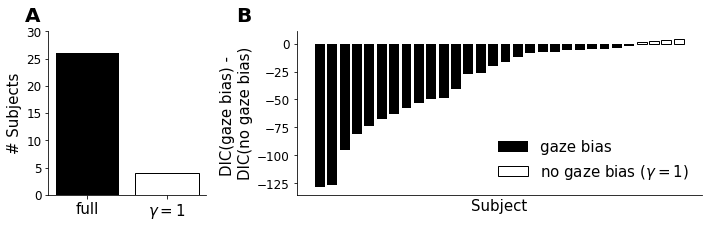

In [9]:
print('Close Figure to continue...')
fig = figure_4(dics_full, dics_nobias)
fig.savefig('results/figures/figure_4_relative_model_comparison.png', dpi=330, bbox_inches='tight')
plt.show()